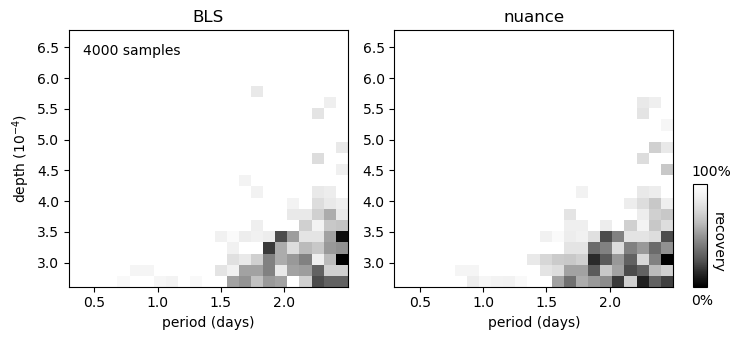

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic_2d

scatter = False

def is_found(period, true_period):
    period_check = np.abs(period - true_period) < 0.01
    alias_check = np.abs(2 * period - true_period) < 0.01
    alias_check |= np.abs(period / 2 - true_period) < 0.01
    if period_check:
        return 1
    elif alias_check:
        return 0.5
    else:
        return 0
    


df = pd.read_csv("../data/results.csv")

df["bls_found"] = df.apply(
    lambda row: is_found(row["bls_period"], row["period"]), axis=1
)
df["nuance_found"] = df.apply(
    lambda row: is_found(row["nuance_period"], row["period"]), axis=1
)

bins = (23, 23)
fig = plt.figure(None, (7.5, 3.5))
cmap = "Greys_r"

ax = plt.subplot(121)
period, depth, found = df[["period", "depth", "bls_found"]].values.T

## theoretical depth
duration = 0.034
def theoretical_depth(period, snr):
    n =  (duration / (2 / 60 / 24)) * 6/period
    return  snr * 5e-4 / np.sqrt(n)
unique_period = np.unique(period)
def plot_theoretical_depth(period, snr, color="w"):
    thd = 1e4 * theoretical_depth(period, snr)
    plt.plot(period, thd, c=color)
    plt.text(0.99*period.max(), 1.01*thd.max(), f"SNR={snr}", ha="right", va="bottom", c=color)
##

depth *= 1e4
stats = binned_statistic_2d(period, depth, found, bins=bins)
if scatter:
    plt.scatter(period, depth, c=found, s=10, cmap=cmap)
else:
    im = plt.imshow(
        stats.statistic.T,
        origin="lower",
        extent=(
            stats.x_edge.min(),
            stats.x_edge.max(),
            stats.y_edge.min(),
            stats.y_edge.max(),
        ),
        aspect="auto",
        cmap=cmap,
    )

# plot_theoretical_depth(unique_period, 5, "0.4")
# plot_theoretical_depth(unique_period, 6, "0.4")
# plot_theoretical_depth(unique_period, 7, "0.4")

plt.ylim(depth.min(), depth.max())

ax.text(.05, .92, f"{len(period)} samples", va="center", ha="left", transform=ax.transAxes)

xlabel = r"period (days)"
ax.set_xlabel(xlabel)
ax.set_ylabel(r"depth ($10^{-4}$)")
ax.set_title("BLS")

ax = plt.subplot(122)
period, depth, found = df[["period", "depth", "nuance_found"]].values.T
depth *= 1e4

if scatter:
    plt.scatter(period, depth, c=found, s=10, cmap=cmap)
else:
    stats = binned_statistic_2d(period, depth, found, bins=bins)
    im = plt.imshow(
        stats.statistic.T,
        origin="lower",
        extent=(
            stats.x_edge.min(),
            stats.x_edge.max(),
            stats.y_edge.min(),
            stats.y_edge.max(),
        ),
        aspect="auto",
        cmap=cmap,
    )

ax.set_xlabel(xlabel)
ax.set_title("nuance")

axins = ax.inset_axes((1.07, 0, 0.05, 0.4))
cb = fig.colorbar(im, cax=axins, orientation="vertical", ticks=[])
cb.ax.text(-0.1, -0, "0%", va="center", ha="left")
cb.ax.text(-0.1, 1.1, "100%", va="center", ha="left")
cb.ax.text(1.3, 0.5, "recovery", va="center", ha="left", rotation=-90)

plt.tight_layout()


In [23]:
np.unique(period)

array([0.30004647, 0.30052221, 0.30064562, ..., 2.49736383, 2.49902434,
       2.49985292])

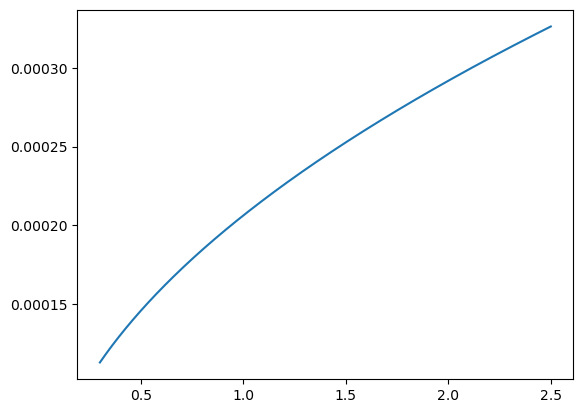

In [26]:
n

array([26.09985778, 24.41583803, 34.21583204, ..., 42.24628866,
        8.97354549, 54.5521114 ])